# Twitter Sentiment Classification

Sentiment Classification is one of the most frequently implemented Machine Learning algorithm in NLP/Text analytics in the industry. All the companies would like to know what customers are saying about them to improve their product/service.

In [1]:
#Importing important modules

import pandas as pd
import numpy as np
import nltk 
from nltk import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

## Download the Stop words

In [ ]:
#Download the Stopwords
nltk.download('stopwords')

In [13]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
cd all/

/Users/sandeep/Desktop/NIT_C_Machine_Learning/all


In [4]:
train_data=pd.read_table("training.txt",delimiter="\t",header=None)

In [6]:
test_data=pd.read_table("testdata.txt",header=None)

In [7]:
test_data

,0
0,"I don't care what anyone says, I like Hillary..."
1,"harvard is dumb, i mean they really have to be..."
2,I'm loving Shanghai > > > ^ _ ^.
3,harvard is for dumb people.
4,"As i stepped out of my beautiful Toyota, i hea..."
5,"Bodies being dismembered, blown apart, and mut..."
6,I love Harvard Square in the fall.
7,London = amazing...
8,I HATE LONDON!..
9,I love MIT so much...


In [8]:
train_data.columns = ['sentiment',"review"]

## Preprocessing the data

- Tokenise the sentences into words
- Lowercase the letters
- Filter only alphabets 
- Remove the Stopwords
- Join the tokens to get the sentence


In [9]:
def pre_process_data (text ):
    words = word_tokenize(text)
    lower_case_words= [w.lower() for w in words]
    words = [w for w in lower_case_words if (w.isalpha()) & (w not in stop)]
    processed_text=" ".join(words)
    return processed_text

In [10]:
text = train_data['review'].iloc[0]

In [11]:
text


'The Da Vinci Code book is just awesome.'

In [14]:
pre_process_data(text)

'da vinci code book awesome'

In [114]:
words=pre_process_data(text)

In [15]:
train_data['review_processed']=train_data['review'].apply(lambda x : pre_process_data(x))

In [16]:
train_data

,sentiment,review,review_processed
0,1,The Da Vinci Code book is just awesome.,da vinci code book awesome
1,1,this was the first clive cussler i've ever rea...,first clive cussler ever read even books like ...
2,1,i liked the Da Vinci Code a lot.,liked da vinci code lot
3,1,i liked the Da Vinci Code a lot.,liked da vinci code lot
4,1,I liked the Da Vinci Code but it ultimatly did...,liked da vinci code ultimatly seem hold
5,1,that's not even an exaggeration ) and at midni...,even exaggeration midnight went buy da vinci c...
6,1,"I loved the Da Vinci Code, but now I want some...",loved da vinci code want something better diff...
7,1,"i thought da vinci code was great, same with k...",thought da vinci code great kite runner
8,1,The Da Vinci Code is actually a good movie...,da vinci code actually good movie
9,1,I thought the Da Vinci Code was a pretty good ...,thought da vinci code pretty good book


Text(0.5, 1.0, '50 Most Frequent Words in the train dataset')

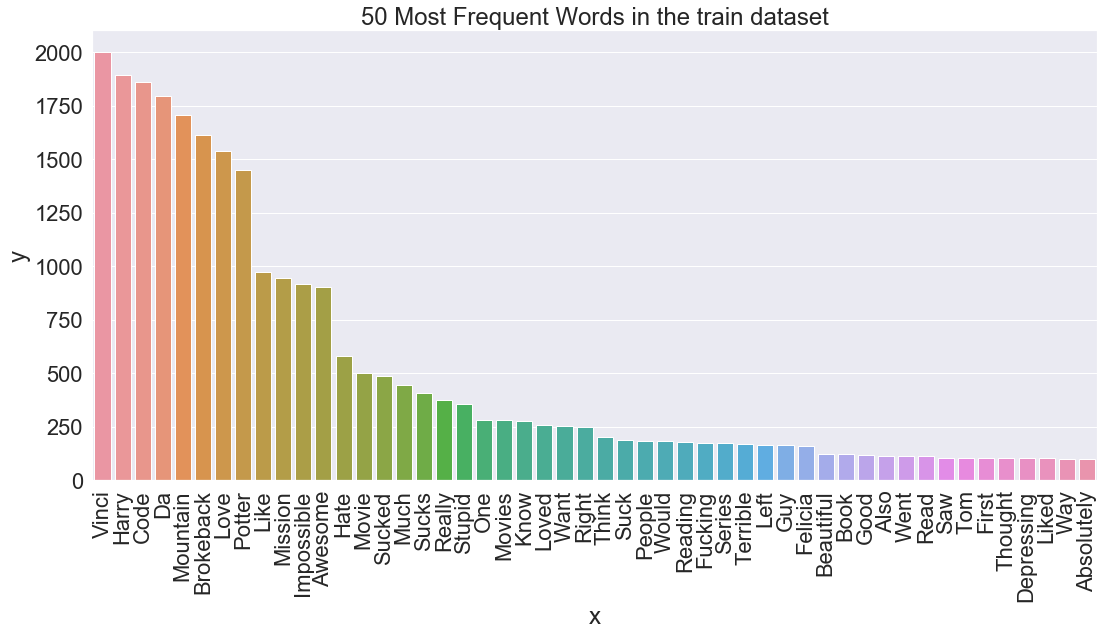

In [17]:
import ipywidgets as widgets
from IPython.display import display

all_text = " "
for sent in train_data['review']:
    all_text =all_text+sent
#print(all_text)    

words_all_text = word_tokenize(all_text)
words_all_text_no_stopwords =[w.lower() for w in words_all_text if (w.lower() not in stop) & (w.isalpha())]
freq = nltk.FreqDist(words_all_text_no_stopwords) 
top_words=pd.DataFrame(freq.most_common(100),columns=['x','y'])

sns.set(rc={'figure.figsize':(18,8.27)})
sns.set(style="darkgrid",font_scale=2,)

ax = sns.barplot(x="x",y="y" ,data=top_words[0:50])

word_list=[w.title()for w in list(top_words["x"].values[0:50])]
ax.set_xticklabels(labels=word_list,rotation=90,)
ax.set_title("50 Most Frequent Words in the train dataset")

Text(0.5, 1.0, '50 Most Frequent Words in the test dataset')

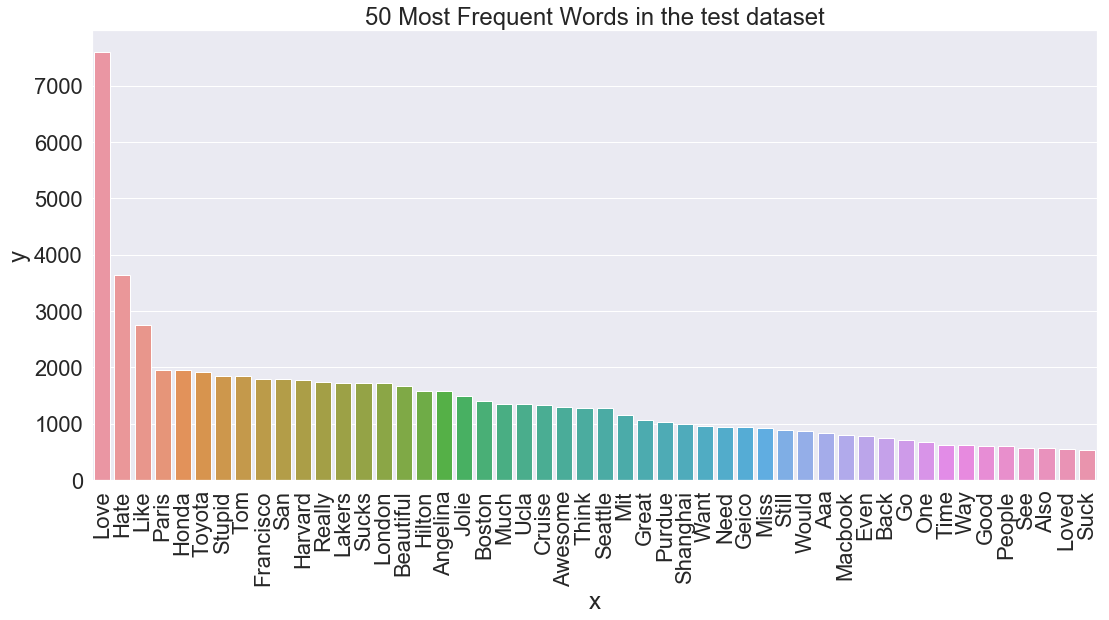

In [18]:
all_text = " "
for sent in test_data[0]:
    all_text =all_text+sent
#print(all_text)    

words_all_text = word_tokenize(all_text)
words_all_text_no_stopwords =[w.lower() for w in words_all_text if (w.lower() not in stop) & (w.isalpha())]
freq = nltk.FreqDist(words_all_text_no_stopwords) 
top_words=pd.DataFrame(freq.most_common(100),columns=['x','y'])

sns.set(rc={'figure.figsize':(18,8.27)})
sns.set(style="darkgrid",font_scale=2,)

ax = sns.barplot(x="x",y="y" ,data=top_words[0:50])

word_list=[w.title()for w in list(top_words["x"].values[0:50])]
ax.set_xticklabels(labels=word_list,rotation=90,)
ax.set_title("50 Most Frequent Words in the test dataset")

In [46]:
#vectors = CountVectorizer()
vectors = TfidfVectorizer()

In [47]:
vectors_fit= vectors.fit_transform(train_data['review_processed'])

In [48]:
processed_df =pd.DataFrame(vectors_fit.todense(),columns=vectors.get_feature_names())

In [49]:
train_data.shape

(6918, 3)

In [26]:
processed_df.shape

(6918, 1923)

In [27]:
word_frequency =pd.DataFrame(processed_df.aggregate(func="sum"))

In [28]:
words_sorted = word_frequency.sort_values(by=[0],ascending=False)

In [29]:
words_sorted

,0
harry,2088
vinci,2001
da,1998
brokeback,1996
code,1986
mountain,1982
potter,1817
love,1542
mission,1090
impossible,1089


In [30]:
X_train = np.reshape(np.array(processed_df),newshape=(-1,1923))
Y_train = np.reshape(np.array(train_data['sentiment']),newshape=(-1,1))

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train)

/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
y_pred = clf.predict(X_train)

In [35]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
Y_train

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [36]:
y_train_flat = Y_train.flatten()

In [37]:
y_train_flat

array([1, 1, 1, ..., 0, 0, 0])

In [39]:
from sklearn.metrics import precision_recall_fscore_support

In [41]:
precision_recall_fscore_support(y_train_flat, y_pred, average='macro')

(0.9846958280575131, 0.9876645134340827, 0.9860381834576448, None)

In [45]:
review_sample="this book is very good"
review_matrix = vectors.transform([review_sample]).todense()
print("Prediction: ", clf.predict(review_matrix))
print("Prediction Probability: ", clf.predict_proba(review_matrix))

Prediction:  [1]
Prediction Probability:  [[0.17997584 0.82002416]]


In [207]:
review_1= test_data.iloc[0][0]
print(review_1)
review_matrix = vectors.transform([review_1]).todense()
print("Prediction: ", clf.predict(review_matrix))
print("Prediction Probability: ", clf.predict_proba(review_matrix))

 I don't care what anyone says, I like Hillary Clinton.
have an awesome time at purdue!..
Yep, I'm still in London, which is pretty awesome: P Remind me to post the million and one pictures that I took when I get back to Markham!...
Have to say, I hate Paris Hilton's behavior but I do think she's kinda cute..
i will love the lakers.
I'm so glad I love Paris Hilton, too, or this would be excruciating.
considering most Geico commericals are stupid...
i liked MIT though, esp their little info book(
Before I left Missouri, I thought London was going to be so good and cool and fun and a really great experience and I was really excited.
I still like Tom Cruise.
well, i had a piece of crap toyota celica but it died in portland and i got a ford ranger..
i love angelina jolie.
I still like Tom Cruise.
UCLA is beautiful.
I think Angelina Jolie is so much more beautiful than Jennifer Anniston, who, by the way, is majorly OVERRATED.
Angelina Jolie is beautiful.
and honda's are awesome:).
I love Ha

In [206]:
review_1= test_data.iloc[1][0]
print(review_1)
review_matrix = vectors.transform([review_1]).todense()
print("Prediction: ", clf.predict(review_matrix))
print("Prediction Probability: ", clf.predict_proba(review_matrix))

harvard is dumb, i mean they really have to be stupid to have not wanted her to be at their school.
Prediction:  [0]
Prediction Probability:  [[0.79121799 0.20878201]]


In [208]:
review_1= test_data.iloc[2][0]
print(review_1)
review_matrix = vectors.transform([review_1]).todense()
print("Prediction: ", clf.predict(review_matrix))
print("Prediction Probability: ", clf.predict_proba(review_matrix))

I'm loving Shanghai > > > ^ _ ^.
Prediction:  [1]
Prediction Probability:  [[0.43590493 0.56409507]]


In [215]:
review_1= test_data.iloc[29][0]
print(review_1)
review_matrix = vectors.transform([review_1]).todense()
print("Prediction: ", clf.predict(review_matrix))
print("Prediction Probability: ", clf.predict_proba(review_matrix))

Oh my god I LOVE Pommes mit Mayo.
Prediction:  [1]
Prediction Probability:  [[0.09302016 0.90697984]]


In [216]:
test_data.shape

(28937, 1)

In [217]:
train_data.shape

(6918, 3)

### Reference for the dataset
https://www.kaggle.com/c/si650winter11/data